In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
df = pd.read_csv("C:\\Users\\sowmi\\Desktop\\Dataset\\spam.csv",encoding= 'latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target']) # Converting Spam and ham to 0's and 1's using encoding

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape   # After reomving the duplicates the row count has been decreased

(5169, 2)

# 2. Exploratory Data Analysis

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

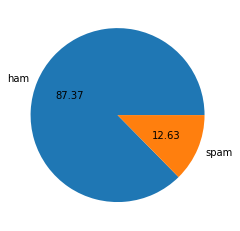

In [21]:
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct = '%0.2f')
plt.show()

In [22]:
df['num_characters'] = df['text'].apply(len)   # Number of characters in each text

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words']= df['text'].apply(lambda x : len(nltk.word_tokenize(x))) # Number of words in each text

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[df['target'] == 1][['num_characters','num_words', 'num_sentence']].describe() #spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
df[df['target'] == 0][['num_characters','num_words', 'num_sentence']].describe() # ham

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


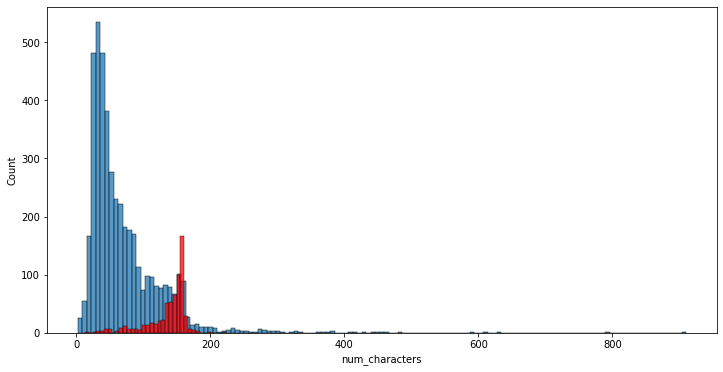

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

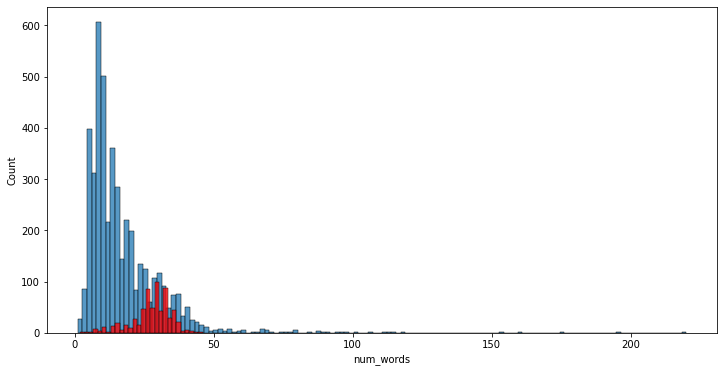

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

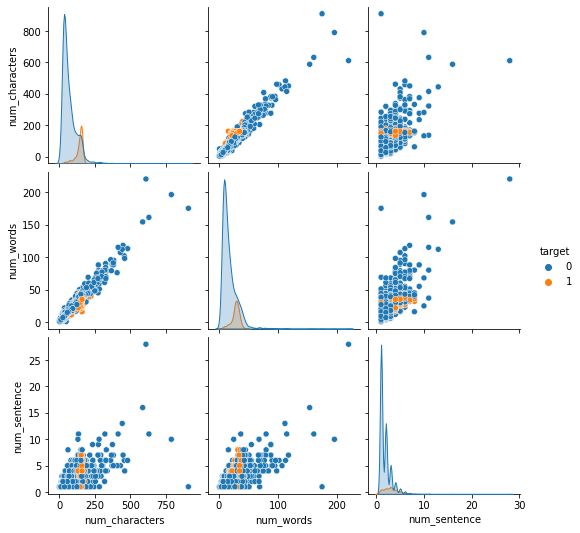

In [32]:
sns.pairplot(df,hue = 'target')
plt.show()

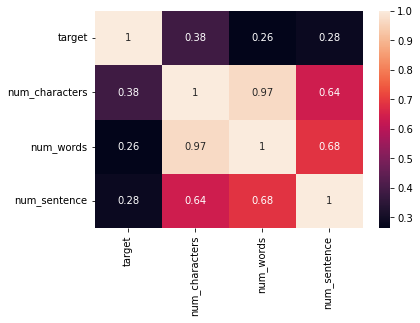

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# 3. Data Preprocessing

i.   Lower case


ii.  Tokenization


iii. Removing special characters

iv.  Removing stop words and punctuation


v.   Stemming

In [34]:
ps = PorterStemmer()

def trasform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    corpus = []
    #corpus = [ps.stem(word) for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            corpus.append(i)
    return " ".join(corpus)

In [35]:
df['clean_text'] = df['text'].apply(trasform_text)

In [36]:
df

,target,text,num_characters,num_words,num_sentence,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [37]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=" "))

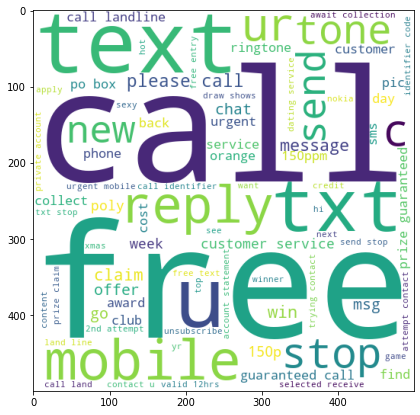

In [39]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)
plt.show()

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=" "))

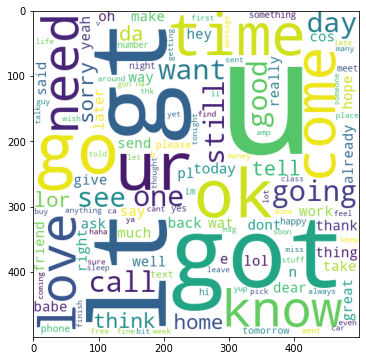

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [42]:
spam_corpus = []

for msg in df[df['target'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

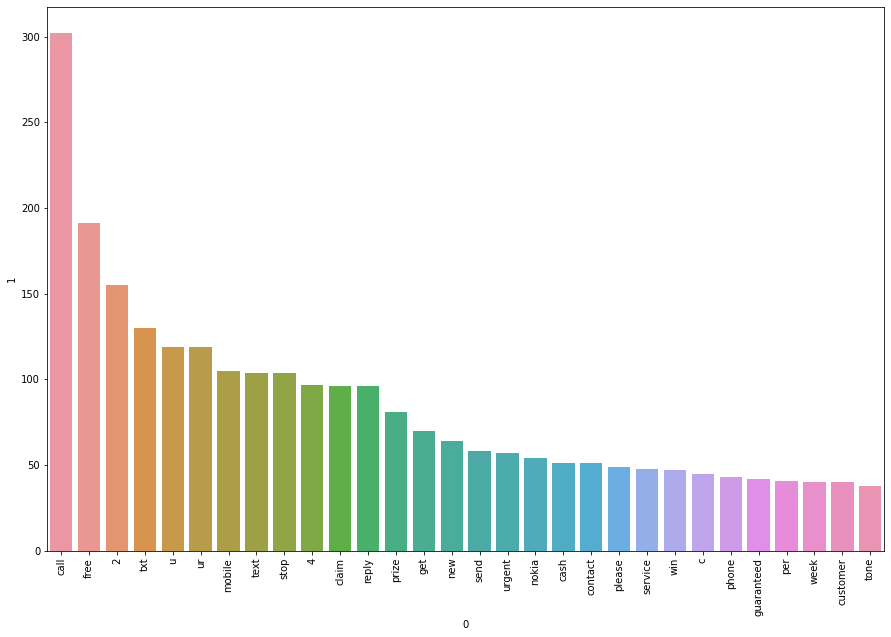

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus = []
for msg in df[df['target'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

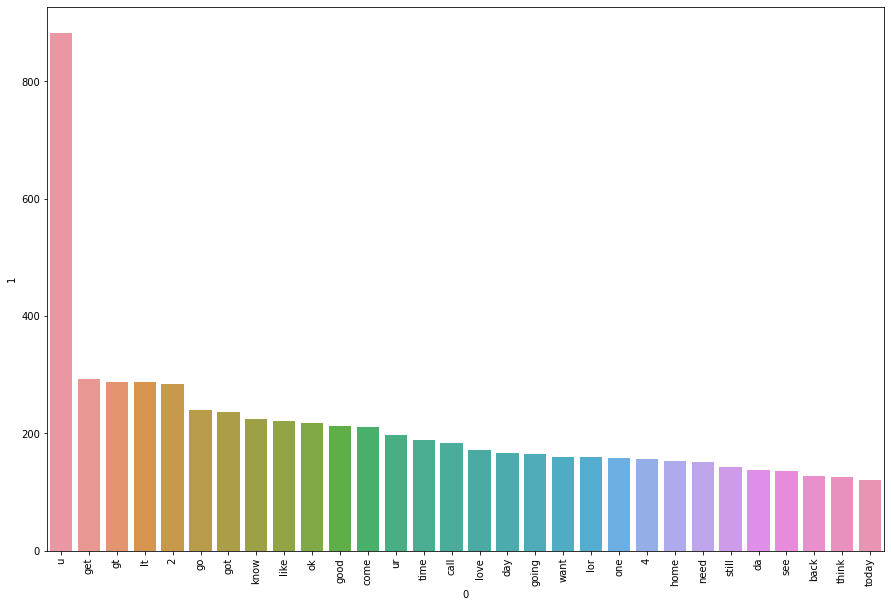

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building 

In [73]:
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [74]:
X = Tfidf.fit_transform(df['clean_text']).toarray()

In [75]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
X.shape

(5169, 3000)

In [77]:
y = df['target'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### 1. Gaussian NB

In [57]:
gnb.fit(X_train,y_train)

GaussianNB()

In [58]:
y_pred = gnb.predict(X_test)

accuracy score is : 0.879110251450677
precision score is : 0.5348837209302325


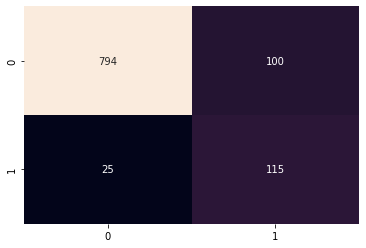

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, fmt= '0.3g', cbar = False)
print("accuracy score is :",accuracy_score(y_test,y_pred))
print("precision score is :",precision_score(y_test,y_pred))

#### 2. Multinomial NB

In [60]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [61]:
y_pred = mnb.predict(X_test)

Accuracy score is: 0.9487427466150871
Precision score is : 1.0


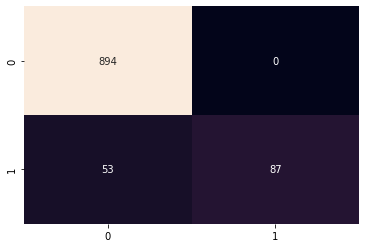

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.3g', cbar = False)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
print("Precision score is :",precision_score(y_test,y_pred))

#### 3. Bernouli NB

In [63]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [64]:
y_pred = bnb.predict(X_test)

Accuracy score is: 0.9642166344294004
Precision score is : 0.9724770642201835


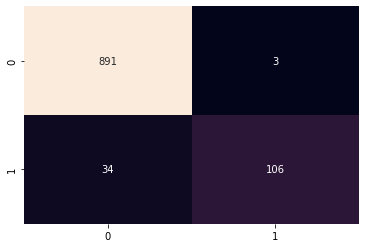

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.3g', cbar = False)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
print("Precision score is :",precision_score(y_test,y_pred))

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print(name)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC
KN
NB
DT
LR
RF
AdaBoost
ETC
GBDT
xgb


In [71]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision':precision_scores}).sort_values(by = 'Accuracy',ascending = False)

In [72]:
performance_df

,Algorithms,Accuracy,Precision
0,SVC,0.970986,0.991071
7,ETC,0.970019,1.000000
5,RF,0.964217,1.000000
9,xgb,0.961315,0.971698
6,AdaBoost,0.960348,0.954128
4,LR,0.953578,0.979167
2,NB,0.948743,1.000000
8,GBDT,0.948743,0.967742
3,DT,0.940039,0.914894
1,KN,0.892650,1.000000


In [83]:
performance_df_3000 = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_pr_3000':precision_scores}).sort_values(by = 'Accuracy_max_ft_3000',ascending = False)

In [84]:
performance_df_3000

,Algorithms,Accuracy_max_ft_3000,Precision_max_pr_3000
7,ETC,0.973888,0.991304
0,SVC,0.972921,0.982759
5,RF,0.970986,1.000000
2,NB,0.967118,0.990741
9,xgb,0.966151,0.981651
6,AdaBoost,0.960348,0.954128
4,LR,0.954545,0.969697
8,GBDT,0.953578,0.989362
3,DT,0.939072,0.932584
1,KN,0.910058,1.000000


In [86]:
final_df = performance_df.merge(performance_df_3000,on='Algorithms')

In [87]:
final_df

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_pr_3000
0,SVC,0.970986,0.991071,0.972921,0.982759
1,ETC,0.970019,1.000000,0.973888,0.991304
2,RF,0.964217,1.000000,0.970986,1.000000
3,xgb,0.961315,0.971698,0.966151,0.981651
4,AdaBoost,0.960348,0.954128,0.960348,0.954128
5,LR,0.953578,0.979167,0.954545,0.969697
6,NB,0.948743,1.000000,0.967118,0.990741
7,GBDT,0.948743,0.967742,0.953578,0.989362
8,DT,0.940039,0.914894,0.939072,0.932584
9,KN,0.892650,1.000000,0.910058,1.000000


In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [104]:
y_pred = rfc.predict(X_test)

Accuracy score is: 0.9709864603481625
Precision score is : 1.0


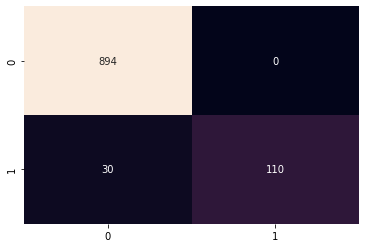

In [105]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.3g', cbar = False)
print("Accuracy score is:",accuracy_score(y_test, y_pred))
print("Precision score is :",precision_score(y_test,y_pred))

In [106]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))